In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

### Практическое задание 0
1. Подгрузите датасет с продажами по США (Sales_USA.csv)
2. Посчитайте средние продажи
3. Определите, сколько клиентов из каждого города имеется в датасете
4. Постройте столбчатую диаграмму частот (вероятностей)
5. Сделайте случайную выборку из распределения (10%). Оцените среднее
6. Сделайте стратификационную выборку из распределения. Оцените среднее в полученной выборке
7. Оцените, насколько выборки различаются по отношению к среднему.

In [ ]:
#df.sample(frac=0.1, random_state=None)

### Практическое задание 1
1. Сформируйте выборку из 1000 значений из нормального распределения. (среднее и стандартное отклонение установите любым)
2. Постройте распределение выборки
3. Посчитайте среднее выборки
4. Постройте цикл, который проделает операцию из пунктво 1 и 2 100 раз. Результаты сложите в список "list_mean"
5. Постройте распределение полученных средних
6. Повторите операции с распределением Пуассона
7. Подгрузите датасет с кредитной историей. Оставьте только колонки 'Maximum Open Credit'.
8. Отфильтруйте верхние и нижние 1% наблюдений.
9. Постройте распределение переменной
10. Посчитайте среднее из выборки 100 раз. Постройте распределение средних из выборки

### Создание выборочных распределений с помощью Python

#### Шаг 1: Импорт необходимых библиотек

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Шаг 2: Генерируем случайные выборки

In [102]:
# Параметры генеральной совокупности
mu = 50
sigma = 10

# Функция для генерации случайных выборок и вычисления выборочных средних
def generate_sample_means(sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.normal(mu, sigma, sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

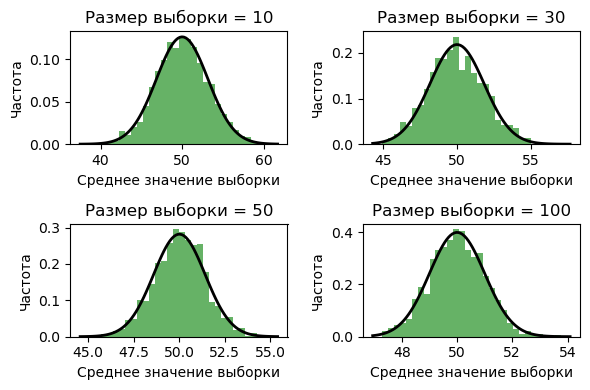

In [108]:
# Параметры для моделирования
sample_sizes = [10, 30, 50, 100]
num_samples = 1000

# Построение графиков выборочных распределений
plt.figure(figsize=(6, 4))

for i, sample_size in enumerate(sample_sizes):
    sample_means = generate_sample_means(sample_size, num_samples)
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Размер выборки = {sample_size}')
    plt.xlabel('Среднее значение выборки')
    plt.ylabel('Частота')
    # Постройте график нормального распределения для сравнения
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma/np.sqrt(sample_size))
    plt.plot(x, p, 'k', linewidth=2)

plt.tight_layout()
plt.show()

### Практическое задание 2
Предположим, что генеральная совокупность имеет среднее значение (𝜇), равное 100, и стандартное отклонение (𝜎), равное 15. Вы берете выборку из 36 наблюдений и хотите найти вероятность того, что среднее значение выборки находится в диапазоне от 95 до 105.

#### Шаг 1: Определение параметров
Чтобы применить ЦПТ, необходимо знать или оценить следующие параметры: 
* Среднее значение генеральной совокупности (𝜇) 
* Стандартное отклонение генеральной совокупности (𝜎) 
* Размер выборки (𝑛) 
* Диапазон, в котором вы хотите найти вероятность для среднего значения выборки.


#### Шаг 2: Вычислите стандартную ошибку
Стандартная ошибка среднего (SEM) рассчитывается следующим образом $\frac{𝜎}{\sqrt{n}}$

Это измеряет дисперсию выборочных средних вокруг среднего генеральной совокупности.

#### Шаг 4: Стандартизация диапазона
Преобразуйте интересующий вас диапазон для выборочного среднего в z-score по формуле:

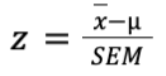

где x  - это значение в диапазоне, для которого вы рассчитываете z-score. Сделайте это как для нижней, так и для верхней границы диапазона.

#### Шаг 5: Используйте стандартное нормальное распределение
Рассчитав z-score, используйте стандартное нормальное распределение, чтобы найти вероятности, соответствующие этим z-score. Это можно сделать с помощью таблиц стандартного нормального распределения или статистического программного обеспечения.

#### Шаг 6: Вычислите вероятность

Вероятность того, что выборочное среднее попадает в указанный диапазон, равна разности между вероятностями, соответствующими z-score верхней и нижней границ.

### Практическое задание 3
1. Подгрузите датасет с кредитной историей. Оставьте только столбец 'Maximum Open Credit'
2. Отфильтруйте выбросы по 1% с обеих сторон
3. Оцените среднее указанной метрики и ее стандартное отклонение
4. Оцените, какая вероятность того, что полученное среднее лежит в районе +-10 % от указанного значения